In [15]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

D:\ruanjiananzhuang\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
housevalue = fch() 

In [6]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看

In [7]:
y = housevalue.target

In [8]:
X.shape

(20640, 8)

In [9]:
y.shape

(20640,)

In [10]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
X.columns=housevalue.feature_names

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [19]:
# 区间打分
y.min()

0.14999

In [20]:
y.max()

5.00001

In [21]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

In [28]:
Xtrain

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35
...,...,...,...,...,...,...,...,...
10394,4.7981,16.0,6.408537,1.067073,1003.0,3.057927,33.54,-117.67
1209,2.3816,16.0,6.055954,1.120516,1516.0,2.175036,38.15,-120.46
14254,1.7500,25.0,3.912500,1.029167,1003.0,4.179167,32.71,-117.10
19059,3.5647,33.0,5.423358,1.058394,781.0,2.850365,38.22,-122.49


In [30]:
# 恢复索引
for i in [Xtrain,Xtest]:
    i.index=range(i.shape[0])

In [31]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [32]:
#如果希望进行数据标准化，还记得应该怎么做吗？
#先用训练集训练fit标准化的类，然后用训练好的类分别转化transform训练集和测试集

In [41]:
reg=LR(normalize=True).fit(Xtrain,Ytrain)

In [42]:
yhat=reg.predict(Xtest)

In [43]:
yhat.min(),yhat.max()

(-0.6528439725036179, 7.146198214270875)

# 探索建好的模型

In [39]:
# w，系数向量
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [40]:
# 截距
reg.intercept_

-36.25689322920384

In [44]:
# 每个特征对应的系数
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968414),
 ('HouseAge', 0.010211268294494098),
 ('AveRooms', -0.10780721617317782),
 ('AveBedrms', 0.6264338275363824),
 ('Population', 5.216125353265523e-07),
 ('AveOccup', -0.0033485096463336177),
 ('Latitude', -0.4130959378947706),
 ('Longitude', -0.4262109536208468)]

 # 回归类的模型评估指标
 第一，我们是否预测到了正确的数值。
第二，我们是否拟合到了足够的信息。
RSS 残差平方和   MSE均方误差（用它）
在sklearn当中，我们有两种方式调用这个评估指标，一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error，另一种是调用
交叉验证的类cross_val_score并使用里面的scoring参数来设置使用均方误差。


In [45]:
from sklearn.metrics import mean_squared_error as MSE

In [47]:
# 均方误差  错了20%
MSE(Ytest,yhat)

0.5309012639324573

In [48]:
Ytest.mean()

2.0819292877906976

In [49]:
cross_val_score(reg,X,y,cv=10,scoring='mean_squared_error')

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [50]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [54]:
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')*(-1)

array([0.48922052, 0.43335865, 0.8864377 , 0.39091641, 0.7479731 ,
       0.52980278, 0.28798456, 0.77326441, 0.64305557, 0.3275106 ])

我们在决策树和随机森林中都提到过，虽然均方误差永远为正，但是sklearn中的参数scoring下，均方误差作为评判
标准时，却是计算”负均方误差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考
虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)。在sklearn当中，所有
的损失都使用负数表示，因此均方误差也被显示为负数了。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字

In [57]:
# 在真实标签和预测值之间的差异外我们使用的是L1范式（绝对值）。现实使用中，MSE和MAE选一个来使用就好了
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_absolute_error').mean()

-0.5445214393266327

# 是否拟合了足够的信息 R平方 范围 负无穷到1,负的R平方不能用

R平方可以使用三种方式来调用，一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。第二种是直接从
线性回归LinearRegression的接口score来进行调用。第三种是在交叉验证中，输入"r2"来调用。

In [58]:
#调用R2
from sklearn.metrics import r2_score

In [62]:
r2_score(yhat,Ytest)

0.3380653761556015

In [60]:
r2 = reg.score(Xtest,Ytest)

r2

0.6043668160178814

# 相同的评估指标不同的结果。
为什么结果会不一致呢？这就是回归和分类算法的不同带来的坑。
在我们的分类模型的评价指标当中，我们进行的是一种 if a == b的对比，这种判断和if b == a其实完全是一种概念，
所以我们在进行模型评估的时候，从未踩到我们现在在的这个坑里。然而看R2的计算公式，R2明显和分类模型的指
标中的accuracy或者precision不一样，R2涉及到的计算中对预测值和真实值有极大的区别，必须是预测值在分子，
真实值在分母，所以我们在调用metrcis模块中的模型评估指标的时候，必须要检查清楚，指标的参数中，究竟是要
求我们先输入真实值还是先输入预测值。

In [63]:
#使用shift tab键来检查究竟哪个值先进行输入
r2_score(Ytest,yhat) #或者你也可以指定参数，就不必在意顺序了

0.6043668160178814

In [64]:
# 或者指定参数
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178814

In [66]:
cross_val_score(reg,X,y,cv=10,scoring='r2').mean()

0.5110068610524555

我们在加利福尼亚房屋价值数据集上的MSE其实不是一个很大的数（0.5），但我们的 不高，这证明
我们的模型比较好地拟合了一部分数据的数值，却没有能正确拟合数据的分布。让我们与绘图来看看，究竟是不是这
样一回事。我们可以绘制一张图上的两条曲线，一条曲线是我们的真实标签Ytest，另一条曲线是我们的预测结果
yhat，两条曲线的交叠越多，拟合就越好。

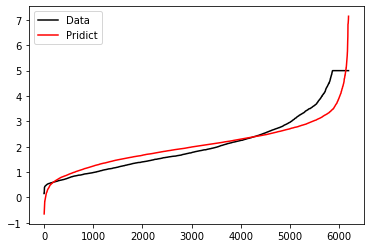

In [68]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c='black',label='Data')
plt.plot(range(len(yhat)),sorted(yhat),c='red',label='Pridict')
plt.legend()
plt.show()

可见，虽然我们的大部分数据被拟合得比较好，但是图像的开头和结尾处却又着较大的拟合误差。如果我们在图像右
侧分布着更多的数据，我们的模型就会越来越偏离我们真正的标签。这种结果类似于我们前面提到的，虽然在有限的
数据集上将数值预测正确了，但却没有正确拟合数据的分布，如果有更多的数据进入我们的模型，那数据标签被预测
错误的可能性是非常大的。

In [69]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80) 
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-178.74658837,   -5.71489468,  -15.43374174,  -75.91498182,
        -74.29843646])

当我们的 显示为负的时候，这证明我们的模型对我们的数据的拟合非常糟糕，模型完全不能使用。所
有，一个负的 是合理的。当然了，现实应用中，如果你发现你的线性回归模型出现了负的R平方 ，不代表你就要接受
他了，首先检查你的建模过程和数据处理过程是否正确，也许你已经伤害了数据本身，也许你的建模过程是存在bug
的。如果是集成模型的回归，检查你的弱评估器的数量是否不足，随机森林，提升树这些模型在只有两三棵树的时候
很容易出现负的 R平方。如果你检查了所有的代码，也确定了你的预处理没有问题，但你的 也还是负的，那这就证
明，线性回归模型不适合你的数据，试试看其他的算法吧。

# 岭回归处理加利福尼亚房价

In [72]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [73]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [74]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [76]:
#数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index=range(i.shape[0])

In [82]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)
# 不存在多重共线性

0.6043610352312278

In [83]:
reg = Ridge(alpha=10).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.604305713802523

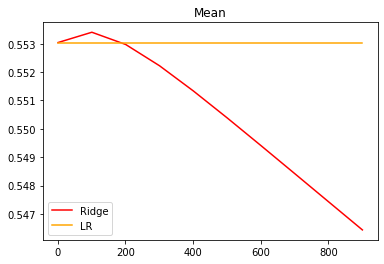

In [78]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

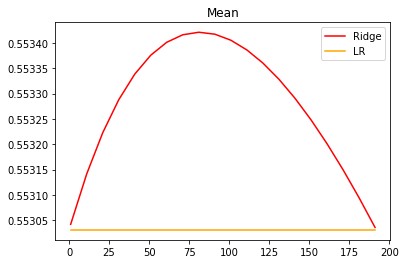

In [79]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

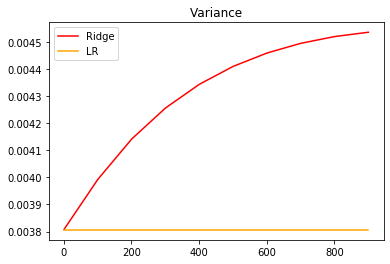

In [81]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").var()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").var()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

可以发现，模型的方差上升快速，不过方差的值本身很小，其变化不超过 上升部分的1/3，因此只要噪声的状况维
持恒定，模型的泛化误差可能还是一定程度上降低了的。虽然岭回归和Lasso不是设计来提升模型表现，而是专注于
解决多重共线性问题的，但当 在一定范围内变动的时候，消除多重共线性也许能够一定程度上提高模型的泛化能
力。

In [84]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

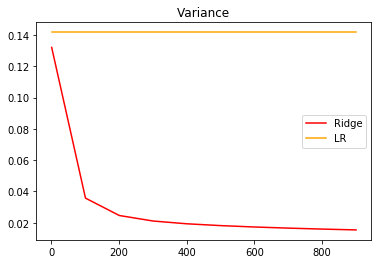

In [85]:
X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

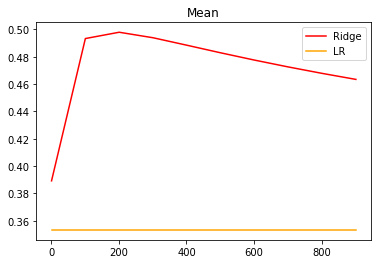

In [88]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

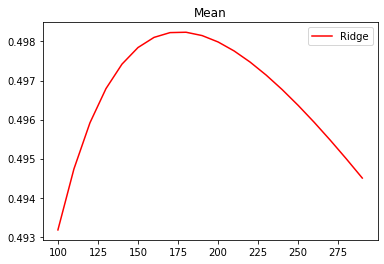

In [91]:
#细化学习曲线  在175附近R平方最大 R平方增加 方差减少
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

可以发现，比起加利佛尼亚房屋价值数据集，波士顿房价数据集的方差降低明显，偏差也降低明显，可见使用岭回归
还是起到了一定的作用，模型的泛化能力是有可能会上升的。
遗憾的是，没有人会希望自己获取的数据中存在多重共线性，因此发布到scikit-learn或者kaggle上的数据基本都经过
一定的多重共线性的处理的，要找出绝对具有多重共线性的数据非常困难，也就无法给大家展示岭回归在实际数据中
大显身手的模样。我们也许可以找出具有一些相关性的数据，但是大家如果去尝试就会发现，基本上如果我们使用岭
回归或者Lasso，那模型的效果都是会降低的，很难升高，这恐怕也是岭回归和Lasso一定程度上被机器学习领域冷
遇的原因。

# 选取最佳的正则化参数取值

我们应该使用交叉验证来选择最佳的正则化系数。在sklearn中，我们有带交叉验证的岭回归可以使用

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [4]:

Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                ,store_cv_values=True
#                  cv不是None，store_cv_values必须设置为False，
                #,cv=5
                ).fit(X, y)

In [5]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y) 

0.6060251767338338

In [6]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape


(20640, 10)

In [7]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [8]:
# R平方最高
 #查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

# Lasso 与多重共线性
Lasso不是从根本上解决多重共线性问题，而是限制多重共线性带来的影响.

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target

In [14]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"] 
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) 
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [16]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain) 
(reg.coef_*100).tolist()

[43.73589305968416,
 1.0211268294494171,
 -10.780721617317688,
 62.64338275363792,
 5.21612535277563e-05,
 -0.3348509646333612,
 -41.30959378947706,
 -42.621095362084674]

In [17]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.735893059684074,
 1.0211268294494118,
 -10.780721617317667,
 62.643382753637724,
 5.216125353268251e-05,
 -0.33485096463335795,
 -41.30959378947694,
 -42.6210953620845]

In [18]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

D:\ruanjiananzhuang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139116, tolerance: 1.9172554769131482
  positive)


[43.73589305968407,
 1.021126829449412,
 -10.780721617317656,
 62.643382753637624,
 5.216125353270122e-05,
 -0.3348509646333579,
 -41.30959378947689,
 -42.62109536208445]

这三条分别是这样的内容：
1. 正则化系数为0，这样算法不可收敛！如果你想让正则化系数为0，请使用线性回归吧
2. 没有正则项的坐标下降法可能会导致意外的结果，不鼓励这样做！
3. 目标函数没有收敛，你也许想要增加迭代次数，使用一个非常小的alpha来拟合模型可能会造成精确度问题！

这是由于sklearn中的Lasso类不是使用最小二乘法来进行求解，而是使用坐标下降。考虑一下，
Lasso既然不能够从根本解决多重共线性引起的最小二乘法无法使用的问题，那我们就不用它。

有了坐标下降，就有迭代和收敛的问题，因此sklearn不推荐我们使用0这样的正则化系数。如果我们的确希望取到
0，那我们可以使用一个比较很小的数，比如0.01，或者0.001这样的值：

In [19]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[43.73575720621597,
 1.0211292318121759,
 -10.78046033625161,
 62.64202320775666,
 5.217068073239373e-05,
 -0.3348506517067613,
 -41.30957143229163,
 -42.62105388932427]

In [22]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[40.105683718344864,
 1.0936292607860143,
 -3.7423763610244687,
 26.524037834897264,
 0.00035253685115039444,
 -0.3207129394887795,
 -40.06483047344842,
 -40.817543991633144]

In [23]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain) 
(Ridge_.coef_*100).tolist()

[34.620815176076974,
 1.5196170869238717,
 0.39686105292101964,
 0.9151812510354816,
 0.002173923801224847,
 -0.3476866014810101,
 -14.736963474215242,
 -13.435576102526896]

In [25]:
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [26]:
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain) 
(lasso_.coef_*100).tolist()
#将系数进

[14.581141247629409,
 0.6209347344423873,
 0.0,
 -0.0,
 -0.00028065986329009956,
 -0.0,
 -0.0,
 -0.0]

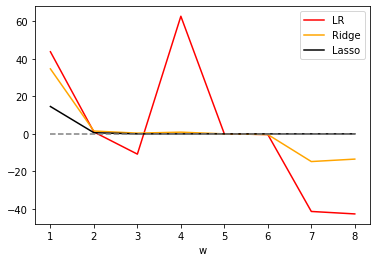

In [27]:

#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

比起岭回归，Lasso所带的L1正则项对于系数的惩罚要重得多，并且它会将系数压缩至0，因此可以被用来做
特征选择。也因此，我们往往让Lasso的正则化系数 在很小的空间中变动，以此来寻找最佳的正则化系数。

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10) 
#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方

In [32]:
alpharange.shape

(200,)

In [33]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [34]:
#自行输入的alpha的取值范围
lasso_ = LassoCV(alphas=alpharange 
                ,cv=5 #交叉验证的折数
                ).fit(Xtrain, Ytrain)

In [35]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [36]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [37]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [39]:
lasso_.mse_path_.mean(axis=1) 
#有注意到在岭回归中我们的轴向是axis=0吗？
#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值
# 返回均方误差

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [40]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [41]:
#与线性回归相比如何？
lasso_.score(Xtest,Ytest) 

0.6038982670571436

In [42]:
# 线性回归R平方
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) 

0.6043668160178823

In [43]:
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
# eps 如何设置？？？？设置太大，系数为0
ls_ = LassoCV(eps=0.00001,n_alphas=300,cv=5).fit(Xtrain, Ytrain)

In [44]:
ls_.alpha_

0.0020954551690628557

In [45]:
 #查看所有自动生成的alpha取值
ls_.alphas_

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [46]:
ls_.alphas_.shape

(300,)

In [47]:
ls_.score(Xtest,Ytest)

0.60389154238192

In [48]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

岭回归和Lasso的核心作用就为大家讲解完毕了。Lasso作为线性回归家族中在改良上走得最远的算法，还有
许多领域等待我们去探讨。比如说，在现实中，我们不仅可以适用交叉验证来选择最佳正则化系数，我们也可以
使用BIC（ 贝叶斯信息准则）或者AIC（Akaike informationcriterion，艾凯克信息准则）来做模型选择。
同时，我们可以不使用坐标下降法，还可以使用最小角度回归来对lasso进行计算。
除了解决多重共线性这个核心问题之外，线性模型还有更重要的事情要做：提升模型表现。这才是机器学习最
核心的需求，而Lasso和岭回归不是为此而设计的。下一节为了提升模型表现而做出的改进：多项式回归。

# 多项式回归

## 总结一下，对于回归问题，数据若能分布为一条直线，则是线性的，否则是非线性。
## 对于分类问题，数据分布若能使用一条直线来划分类别，则是线性可分的，否则数据则是线性不可分的。

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [51]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

In [52]:
# X作为横坐标
X

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [53]:
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数

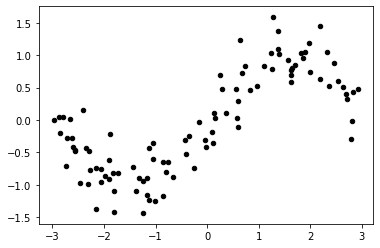

In [54]:
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [55]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [56]:
X = X.reshape(-1, 1)

In [57]:
X.shape

(100, 1)

In [58]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y) 

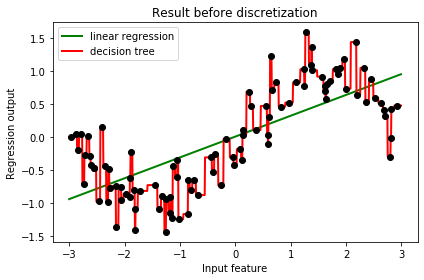

In [59]:
#放置画布
fig, ax1 = plt.subplots(1) 
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree") 
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') 
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

决策树无法写作一个方程（我们在XGBoost章节中会详细讲解如何将决策树定义成一个方程，但它绝对不是一个形似
的方程），它是一个典型的非线性模型，当它被用于拟合非线性数据，可以发挥奇效。其他典型的非线性
模型还包括使用高斯核的支持向量机，树的集成算法，以及一切通过三角函数，指数函数等非线性方程来建立的模
型。线性模型可以用来拟合非线性数据，而非线性模型也可以用来拟合线性数据，更
神奇的是，有的算法没有模型也可以处理各类数据，而有的模型可以既可以是线性，也可以是非线性模型

线性模型处理非线性数据：分箱。非线性模型处理线性数据，容易出现过拟合
从图像上可以看出，线性回归无法拟合出这条带噪音的正弦曲线的真实面貌，只能够模拟出大概的趋势，而决策树却
通过建立复杂的模型将几乎每个点都拟合出来了。此时此刻，决策树正处于过拟合的状态，对数据的学习过于细致，
而线性回归处于拟合不足的状态，这是由于模型本身只能够在线性关系间进行拟合的性质决定的。为了让线性回归在
类似的数据上变得更加强大，我们可以使用分箱，也就是离散化连续型变量的方法来处理原始数据，以此来提升线性
回归的表现。来看看我们如何实现：


# 使用分箱处理非线性问题
让线性回归在非线性数据上表现提升的核心方法之一是对数据进行分箱，也就是离散化。与线性回归相比，我们常用
的一种回归是决策树的回归。我们之前拟合过一条带有噪音的正弦曲线以展示多元线性回归与决策树的效用差异，我
们来分析一下这张图，然后再使用采取措施帮助我们的线性回归。
# 分箱及分箱的相关问题

In [62]:
from sklearn.preprocessing import KBinsDiscretizer
#将数据分箱
#分几类？ #ordinal
enc = KBinsDiscretizer(n_bins=10 ,encode="onehot") 
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0 X.shape

In [61]:
X.shape

(100, 1)

In [63]:
X_binned
#使用pandas打开稀疏矩阵

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [64]:
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)

In [66]:
LinearR_.predict(line) 
#line作为测试集

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [67]:
line.shape #测试

(1000, 1)

In [68]:
X_binned.shape #训练

(100, 10)

In [69]:
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)

In [70]:
line_binned.shape #分箱后的数据是无法进行绘图的

(1000, 10)

In [71]:
line_binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [72]:
LinearR_.predict(line_binned).shape

(1000,)

In [75]:
LinearR_.predict(line_binned).shape
#line作为测试集

(1000,)

# 使用分箱数据进行建模和绘图

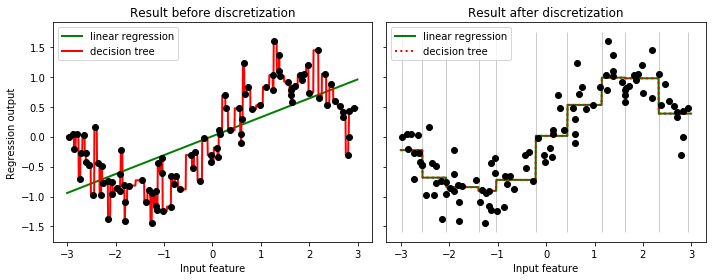

In [77]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line) 
#将两张图像绘制在一起，布置画布
#sharey=True ,让两张图共享y轴上的刻度
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True , figsize=(10, 4))
#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y) 
#进行预测，在图2中布置在分箱数据上进行预测的结果
 #横坐标 #分箱后的特征矩阵的结果
ax2.plot(line, LinearR_.predict(line_binned) , linewidth=2, color='green', linestyle='-', label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red', linestyle=':', label='decision tree') 

#绘制和箱宽一致的竖线
#x轴 y轴的上限和下限
ax2.vlines(enc.bin_edges_[0] , *plt.gca().get_ylim() , linewidth=1, alpha=.2) #将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k') 
#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

从图像上可以看出，离散化后线性回归和决策树上的预测结果完全相同了——线性回归比较成功地拟合了数据的分
布，而决策树的过拟合效应也减轻了。由于特征矩阵被分箱，因此特征矩阵在每个区域内获得的值是恒定的，因此所
有模型对同一个箱中所有的样本都会获得相同的预测值。与分箱前的结果相比，线性回归明显变得更加灵活，而决策
树的过拟合问题也得到了改善。但注意，一般来说我们是不使用分箱来改善决策树的过拟合问题的，因为树模型带有
丰富而有效的剪枝功能来防止过拟合。在这个例子中，我们设置的分箱箱数为10，不难想到这个箱数的设定肯定会影响
模型最后的预测结果，我们来看看不同的箱数会如何影响回归的结果.
# 箱子数如何影响模型的结果

0.8649069759304867


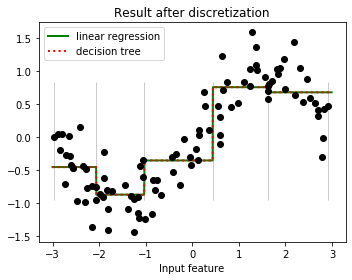

In [82]:
# 分5箱
enc = KBinsDiscretizer(n_bins=5,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line , LinearR_.predict(line_binned) , linewidth=2, color='green', linestyle='-', label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

# 如何选取最优的箱数

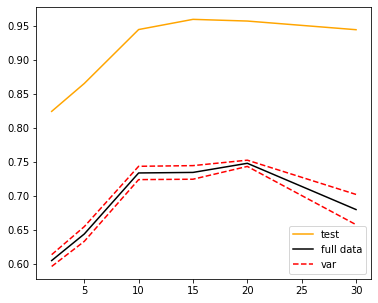

In [83]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

# 确定最佳分箱为20，可能存在过拟合，方差最小
在工业中，大量离散化变量与线性模型连用的实例很多，在深度学习出现之前，这种模式甚至一度统治一些工业中的
机器学习应用场景，可见效果优秀，应用广泛。对于现在的很多工业场景而言，大量离散化特征的情况可能已经不是
那么多了，不过大家依然需要对“分箱能够解决线性模型无法处理非线性数据的问题”有所了解。
# 多项式回归
## 多项式核函数在低维数据中帮助我们，多项式变化是在高维呈现中帮助我们，它们不同

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# 如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [4]:
#二次多项式，
poly=PolynomialFeatures(degree=2)

In [6]:
# 直接调用接口
X_=poly.fit_transform(X)

In [7]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [8]:
X_.shape

(3, 3)

In [9]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [10]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [11]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)

In [12]:
xxx.shape

(3, 4)

In [13]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [18]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_

array([ 3.10862447e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [19]:
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036884

In [21]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept
#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [24]:
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

这只是一维状况的表达，大多数时候我们的原始特征矩阵不可能会是一维的，至少也是二维以上，很多时候还
可能存在上千个特征或者维度。现在我们来看看原始特征矩阵是二维的状况：

In [25]:
X = np.arange(6).reshape(3, 2) 
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [26]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [27]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

## 当我们进行多项式转换的时候，多项式会产出到最高次数为止的所有低高次项。

In [28]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [29]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X) 
#对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [30]:
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3) 
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [32]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [33]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)
X_.shape

(3, 1771)

随着原特征矩阵的维度上升，随着我们规定的最高次数的
上升，数据会变得越来越复杂，维度越来越多，并且这种维度的增加并不能用太简单的数学公式表达出来。因此，多
项式回归没有固定的模型表达式，多项式回归的模型最终长什么样子是由数据和最高次数决定的，因此我们无法断言
说某个数学表达式"就是多项式回归的数学表达"，因此要求解多项式回归不是一件容易的事儿，感兴趣的大家可以自
己去尝试看看用最小二乘法求解多项式回归。
# 我们就来看看多项式回归的根本作用：处理非线性问题。degree通常在10以下

In [34]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) 
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#将X升维，准备好放入sklearn中 
X = X.reshape(-1,1)
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

In [35]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y) 
#对训练数据的拟合
LinearR.score(X,y) 

0.5361526059318595

In [36]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [37]:
#多项式拟合，设定高次项
d=5 
#进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = PF(degree=d).fit_transform(line) 
#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y) 

0.8561679370344798

In [38]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787959

In [ ]:
#我们将这个过程可视化：

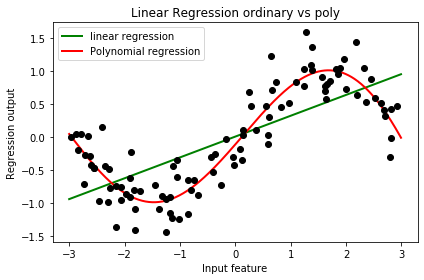

In [42]:
import matplotlib.pyplot as plt
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line) 

#放置画布
fig, ax1 = plt.subplots(1) 
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red',label="Polynomial regression") 

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') 

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

#来一起鼓掌，感叹多项式回归的神奇
#随后可以试试看较低和较高的次方会发生什么变化
#d=2
#d=20

多项式回归能够较好地拟合非线性数据，还不容易发生过拟合，可以说是保留了线性回归作为
线性模型所带的“不容易过拟合”和“计算快速”的性质，同时又实现了优秀地拟合非线性数据。在这里，为大家梳理几个常见问题和讨论，供大家参考。

# 多项式回归的可解释性

In [43]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.arange(9).reshape(3, 3) 
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
poly = PolynomialFeatures(degree=5).fit(X) 
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

#### 加利佛尼亚房价数据集给大家作为例子，可以直接在接口get_feature_names()中输入标签名称来查看新特征究竟是由原特征矩阵中的什么特征组成的：

In [49]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
housevalue.feature_names
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [50]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
poly = PolynomialFeatures(degree=2).fit(X,y)

In [52]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [53]:
X_ = poly.transform(X)

In [54]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)

In [55]:
coef = reg.coef_

In [56]:
coef

array([ 5.91954905e-08, -1.12430255e+01, -8.48898548e-01,  6.44105925e+00,
       -3.15913301e+01,  4.06090675e-04,  1.00386233e+00,  8.70568189e+00,
        5.88063272e+00, -3.13081243e-02,  1.85994718e-03,  4.33020429e-02,
       -1.86142298e-01,  5.72831191e-05, -2.59019461e-03, -1.52505717e-01,
       -1.44242944e-01,  2.11725290e-04, -1.26218986e-03,  1.06115042e-02,
        2.81885253e-06, -1.81716946e-03, -1.00690373e-02, -9.99950175e-03,
        7.26947737e-03, -6.89064349e-02, -6.82365542e-05,  2.68878839e-02,
        8.75089934e-02,  8.22890383e-02,  1.60180949e-01,  5.14264001e-04,
       -8.71911383e-02, -4.37043025e-01, -4.04150602e-01,  2.73779044e-09,
        1.91426752e-05,  2.29529763e-05,  1.46567729e-05,  8.71561039e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867357e-02,  1.08107173e-01,
        3.99077351e-02])

In [57]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919549048447345e-08),
 ('住户收入中位数', -11.24302549778857),
 ('房屋使用年代中位数', -0.8488985476088251),
 ('平均房间数目', 6.441059253207444),
 ('平均卧室数目', -31.591330073925615),
 ('街区人口', 0.0004060906749544157),
 ('平均入住率', 1.0038623258554167),
 ('街区的纬度', 8.705681893519609),
 ('街区的经度', 5.8806327249800585),
 ('住户收入中位数^2', -0.03130812429297722),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599471756685286),
 ('住户收入中位数 平均房间数目', 0.043302042913689165),
 ('住户收入中位数 平均卧室数目', -0.18614229756005965),
 ('住户收入中位数 街区人口', 5.728311910315961e-05),
 ('住户收入中位数 平均入住率', -0.0025901946062503517),
 ('住户收入中位数 街区的纬度', -0.1525057169138717),
 ('住户收入中位数 街区的经度', -0.14424294360657802),
 ('房屋使用年代中位数^2', 0.00021172529012454923),
 ('房屋使用年代中位数 平均房间数目', -0.0012621898643736208),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504227003682),
 ('房屋使用年代中位数 街区人口', 2.818852532615601e-06),
 ('房屋使用年代中位数 平均入住率', -0.001817169462569288),
 ('房屋使用年代中位数 街区的纬度', -0.010069037310010288),
 ('房屋使用年代中位数 街区的经度', -0.009999501749588633),
 ('平均房间数目^2', 0.0072694773680207336),
 ('平均房间数目 平均

In [58]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [61]:
coeff


,feature,coef
0,1,5.91955e-08
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
3,平均房间数目,6.44106
4,平均卧室数目,-31.5913
5,街区人口,0.000406091
6,平均入住率,1.00386
7,街区的纬度,8.70568
8,街区的经度,5.88063
9,住户收入中位数^2,-0.0313081


In [60]:
coeff.columns = ["feature","coef"]

In [62]:
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


可以发现，不仅数据的可解释性还存在，我们还可以通过这样的手段做特征工程——特征创造。多项式帮助我们进行
了一系列特征之间相乘的组合，若能够找出组合起来后对标签贡献巨大的特征，那我们就是创造了新的有效特征，对
于任何学科而言发现新特征都是非常有价值的。
在加利佛尼亚房屋价值数据集上来再次确认多项式回归提升模型表现的能力：

In [63]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [64]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [65]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7454791821251657
time:1.2840604782104492


In [66]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

D:\ruanjiananzhuang\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


R2:0.9743528054293236
time:16.318530559539795


In [67]:
# 多项式可以进行特征创造。线性模型非常快，非线性模型准确率高

狭义线性模型：自变量上不能有高此项，自变量与标签之间不能存在非线性关系。
广义线性模型：只要标签与模型拟合出的参数之间的关系是线性的，模型就是线性的。这是说，只要生成的一系
列 之间没有相乘或者相除的关系，我们就认为是线性的。
多项式回归通常被认为是非线性模型，但广义上它是一种特殊的线性模型，它能够帮助我们处理非线性数
据，是线性回归的一种进化。